In [1]:
import sys
sys.path.append("../library")

In [2]:
from __future__ import print_function
from thinkbayes2 import Suite
import thinkplot

In [3]:
# dice puzzle: based on sampling result of dice, to get the most possible dice
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
#             impossible for dice 'hypo' throw out number 'data'
            return 0
        else:
            return 1.0 / hypo

In [4]:
suite = Dice([4, 6, 8, 12, 20])
suite.Update(6)
suite.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


In [5]:
suite = Dice([4, 6, 8, 12, 20])
suite.UpdateSet([6, 8, 7, 7, 5, 4])
suite.Print()

4 0.0
6 0.0
8 0.91584527196901
12 0.08040342579700496
20 0.0037513022339850668


In [6]:
# locomotive problem from Freadrick Mosteller's fifty challenging problems in probablity with solution (Dover, 1987)
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0 / hypo

333.41989326371095


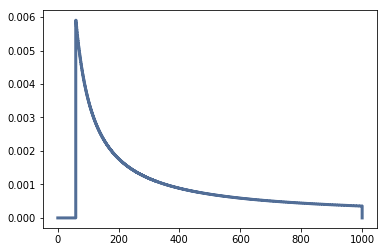

In [7]:
N=1000
hypos=range(1, 1+N)
suite=Train(hypos)
suite.Update(60)
# suite.Print()
print(suite.Mean())
# refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/train.py
thinkplot.PrePlot(1)
thinkplot.Pmf(suite)
# alternative: to save as pdf
# thinkplot.Save(root='train1',
#                xlabel='Number of trains',
#                ylabel='Probability',
#                formats=['pdf'])

In [8]:
# Prior with power law
class Train2(Dice):
    def __init__(self, hypos, alpha = 1.0):
        super().__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo ** (-alpha))
        self.Normalize()

178.54735317971574


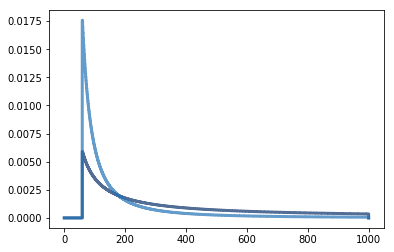

In [9]:
N=1000
hypos=range(1, 1+N)
suite1=Train2(hypos)
suite1.Update(60)
print(suite1.Mean())
thinkplot.PrePlot(1)
thinkplot.Pmf(suite)
thinkplot.Pmf(suite1)

In [10]:
# refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/train3.py
def MakePosterior(high, dataset, constructor):
    """Makes and updates a Suite.
    high: upper bound on the range of hypotheses
    dataset: observed data to use for the update
    constructor: function that makes a new suite
    Returns: posterior Suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)
    suite.name = str(high)

    for data in dataset:
        suite.Update(data)

    return suite

In [11]:
def ComparePriors():
    """Runs the analysis with two different priors and compares them."""
    dataset = [60]
    high = 1000

    thinkplot.Clf()
    thinkplot.PrePlot(num=2)

    constructors = [Train, Train2]
    labels = ['uniform', 'power law']

    for constructor, label in zip(constructors, labels):
        suite = MakePosterior(high, dataset, constructor)
        suite.name = label
        thinkplot.Pmf(suite)

#     thinkplot.Save(root='train4',
#                 xlabel='Number of trains',
#                 ylabel='Probability')

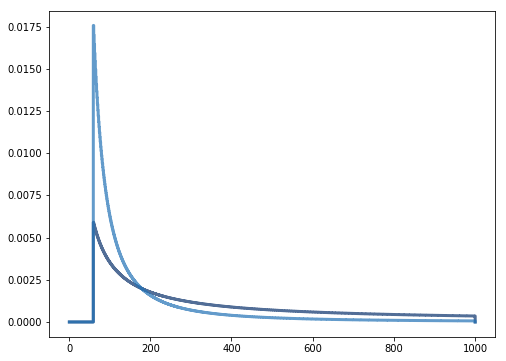

In [12]:
ComparePriors()

In [13]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean())
    # Percentile for credible interval
    print("credible interval: {}, {}".format(suite.Percentile(5), suite.Percentile(95)))
    # using cdf
    cdf = suite.MakeCdf()
    print("credible interval: {}, {}".format(cdf.Percentile(5), cdf.Percentile(95)))

500 130.70846986256004
credible interval: 91, 235
credible interval: 91, 235
1000 133.2752313750312
credible interval: 91, 242
credible interval: 91, 242
2000 133.99746308073065
credible interval: 91, 243
credible interval: 91, 243


In [16]:
# exercise 3.9, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/train4_soln.py
class Train3(Suite):
    def Likelihood(self, data, hypo):
        N = hypo
#         k is number of company, m is the observed train number
        k, m = data
        if N < m:
            return 0
#         as equal probablity
        return m ** (k-1) / N ** k

In [17]:
N=1000
hypos=range(1, 1+N)
suite3=Train3(hypos)
data = 3, 70
suite3.Update(data)
print('posterior mean', suite3.Mean())

posterior mean 129.97584542536543


In [ ]:
thinkplot.Pmf(suite3, label='after 70')
thinkplot.Show(xlabel='Number of trains', ylabel='PMF')